In [27]:
import pandas as pd
import numpy as np
import csv 
import matplotlib.pyplot as plt
import seaborn as sns


#https://altair-viz.github.io/gallery/errorbars_with_std.html
#import altair as alt
#from vega_datasets import data

#defining paths
allAlgorithms_base = './newcsv/All_baseline.csv'
allAlgorithms_H1 = './newcsv/All_H1v2.csv'
allAlgorithms_H2 = './newcsv/All_H2.csv'
allAlgorithms_H3 = './newcsv/All_H3.csv'
#classifierChain = './experiment/dfTesteClassifierChain_13Labels.csv'


dataBinaryBase = pd.read_csv(allAlgorithms_base)
dataBinaryH1 = pd.read_csv(allAlgorithms_H1)
dataBinaryH2 = pd.read_csv(allAlgorithms_H2)
dataBinaryH3 = pd.read_csv(allAlgorithms_H3)

dataBinaryBase['H']='baseline'
dataBinaryH1['H']='H1'
dataBinaryH2['H']='H2'
dataBinaryH3['H']='H3'

frames = [dataBinaryBase, dataBinaryH1, dataBinaryH2, dataBinaryH3]

dataBinary = pd.concat(frames)

dataBinary.to_csv('./newcsv/All_corpus.csv', index=False)

#dataClassifier = pd.read_csv(classifierChain)

In [28]:
dataBinary.tail()

,date_time,tf-IDF,#_TopTerms,Stop_Word,Train/Test_Size,Algorithm,Accuracy_Score,Accuracy_Score_not_normalized,zero_one_loss,AUC-PR,hamming_loss_avg,Jaccard_samples,Jaccard_macro,Precision,Recall,Fmeasure_Score,i,project,H
3005,9/21/21 20:30,"(4, 4)",5622,Yes,0.4,MLkNN,0.161290,55,0.838710,0.832321,0.150342,0.657883,0.647732,0.803866,0.769314,0.786211,5,jabref50,H3
3006,9/21/21 20:30,"(4, 4)",5622,Yes,0.4,MLkNN,0.193548,66,0.806452,0.829689,0.155425,0.650285,0.639619,0.782585,0.777839,0.780205,6,jabref50,H3
3007,9/21/21 20:30,"(4, 4)",5622,Yes,0.4,MLkNN,0.193548,66,0.806452,0.811512,0.161486,0.613469,0.594502,0.825494,0.679955,0.745690,7,jabref50,H3
3008,9/21/21 20:30,"(4, 4)",5622,Yes,0.4,MLkNN,0.167155,57,0.832845,0.825439,0.161877,0.620289,0.603828,0.815245,0.699557,0.752983,8,jabref50,H3
3009,9/21/21 20:30,"(4, 4)",5622,Yes,0.4,MLkNN,0.129032,44,0.870968,0.815571,0.161877,0.625921,0.628533,0.764321,0.779633,0.771901,9,jabref50,H3


In [29]:
dataBinary.shape

(11770, 19)

In [30]:
dataBinary = dataBinary[dataBinary.project != 'presto']

In [31]:
dataBinary = dataBinary[dataBinary.project != 'jabref']

In [32]:
dataBinary.shape

(8170, 19)

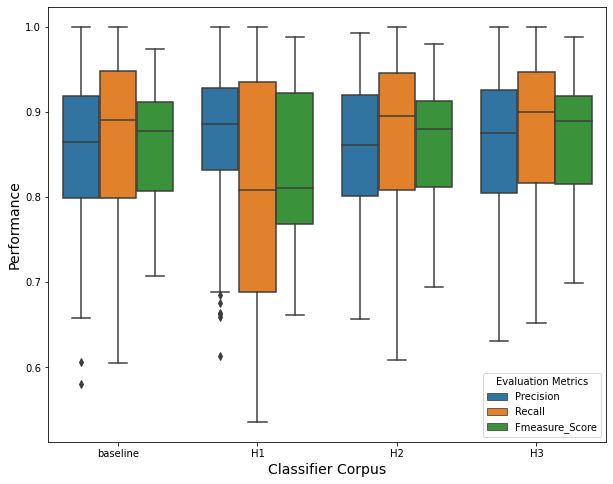

In [33]:
dd=pd.melt(dataBinary,id_vars=['H'],value_vars=['Precision','Recall','Fmeasure_Score'],var_name='Evaluation Metrics')

plt.figure(figsize=(10, 8))
ax = sns.boxplot(y='value',x='H',data=dd,hue='Evaluation Metrics')
plt.ylabel("Performance", size=14)
plt.xlabel("Classifier Corpus",size=14)

labels=["Precision", "Recall", "F-measure"]
#h, l = ax.get_legend_handles_labels()
#ax.legend(h, labels, title="Evaluation Metrics",bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
#plt.title("Evaluation Metrics by Hypothesis", size=12)
plt.savefig("H1H2H3Baseline-comparison.pdf")
plt.show()



In [34]:
dataBinary.groupby(['tf-IDF','Train/Test_Size','Algorithm']).mean()

#_TopTerms  Accuracy_Score  \
tf-IDF Train/Test_Size Algorithm                                         
(1, 1) 0.2             DecisionTree        1691.375000        0.568442   
                       LogisticRegression  2988.500000        0.186550   
                       MLPClassifier       1691.375000        0.592007   
                       MLkNN               1691.375000        0.536557   
                       RandomForest        1627.058824        0.594868   
       0.3             DecisionTree        1691.375000        0.550775   
                       LogisticRegression  2988.500000        0.167578   
                       MLPClassifier       1691.375000        0.587230   
                       MLkNN               1691.375000        0.524298   
                       RandomForest        1691.375000        0.581578   
       0.4             DecisionTree        1691.375000        0.542434   
                       LogisticRegression  2988.500000        0.162683   
                       MLPClassifier       1691.375000        0.574977   
                       MLkNN               1691.375000        0.515761   
                       RandomForest        1691.375000        0.574763   
(2, 2) 0.2             DecisionTree        1691.375000        0.554396   
                       LogisticRegression  2988.500000        0.181433   
                       MLPClassifier       1691.375000        0.573932   
                       MLkNN               1691.375000        0.515434   
                       RandomForest        1691.375000        0.555246   
       0.3             DecisionTree        1691.375000        0.549351   
                       LogisticRegression  2988.500000        0.158789   
                       MLPClassifier       1691.375000        0.557347   
                       MLkNN               1691.375000        0.502072   
                       RandomForest        1691.375000        0.543012   
       0.4             DecisionTree        1691.375000        0.537601   
                       LogisticRegression  2988.500000        0.148314   
                       MLPClassifier       1691.375000        0.544809   
                       MLkNN               1691.375000        0.486661   
                       RandomForest        1691.375000        0.532356   
(3, 3) 0.2             DecisionTree        1691.375000        0.514651   
                       LogisticRegression  2988.500000        0.147661   
                       MLPClassifier       1691.375000        0.529329   
                       MLkNN               1691.375000        0.491890   
                       RandomForest        1691.375000        0.518599   
       0.3             DecisionTree        1691.375000        0.495924   
                       LogisticRegression  2988.500000        0.142383   
                       MLPClassifier       1691.375000        0.517208   
                       MLkNN               1691.375000        0.459555   
                       RandomForest        1691.375000        0.509134   
       0.4             DecisionTree        1691.375000        0.495041   
                       LogisticRegression  2988.500000        0.128226   
                       MLPClassifier       1691.375000        0.509489   
                       MLkNN               1691.375000        0.456280   
                       RandomForest        1691.375000        0.500357   
(4, 4) 0.2             DecisionTree        1691.375000        0.499911   
                       LogisticRegression  2988.500000        0.148684   
                       MLPClassifier       1691.375000        0.501532   
                       MLkNN               1691.375000        0.463807   
                       RandomForest        1691.375000        0.501626   
       0.3             DecisionTree        1691.375000        0.486237   
                       LogisticRegression  2988.500000        0.130078   
                       MLPClassifier       1691.

In [35]:
dataBinary.nlargest(50,['Precision','Fmeasure_Score'])

,date_time,tf-IDF,#_TopTerms,Stop_Word,Train/Test_Size,Algorithm,Accuracy_Score,Accuracy_Score_not_normalized,zero_one_loss,AUC-PR,hamming_loss_avg,Jaccard_samples,Jaccard_macro,Precision,Recall,Fmeasure_Score,i,project,H
156,9/15/21 9:34,"(2, 2)",216,Yes,0.2,MLkNN,0.771429,27,0.228571,0.997117,0.035714,0.886395,0.940120,1.000000,0.940120,0.969136,6,mockito,H1
176,9/15/21 9:34,"(2, 2)",216,Yes,0.3,DecisionTree,0.788462,41,0.211538,0.992321,0.048077,0.870833,0.920319,1.000000,0.920319,0.958506,6,mockito,H1
310,9/15/21 9:38,"(3, 3)",216,Yes,0.3,MLkNN,0.730769,38,0.269231,0.991873,0.045673,0.870147,0.920168,1.000000,0.920168,0.958425,0,mockito,H1
278,9/15/21 9:37,"(3, 3)",216,Yes,0.2,MLkNN,0.857143,30,0.142857,0.983459,0.042857,0.910000,0.909774,1.000000,0.909774,0.952756,8,mockito,H1
219,9/15/21 9:35,"(2, 2)",216,Yes,0.4,DecisionTree,0.742857,52,0.257143,0.984872,0.053571,0.849762,0.908537,1.000000,0.908537,0.952077,9,mockito,H1
350,9/15/21 9:39,"(3, 3)",216,Yes,0.4,MLkNN,0.714286,50,0.285714,0.992112,0.053571,0.847585,0.906542,1.000000,0.906542,0.950980,0,mockito,H1
359,9/15/21 9:39,"(3, 3)",216,Yes,0.4,MLkNN,0.714286,50,0.285714,0.994322,0.058929,0.837721,0.899390,1.000000,0.899390,0.947030,9,mockito,H1
212,9/15/21 9:35,"(2, 2)",216,Yes,0.4,DecisionTree,0.771429,54,0.228571,0.983298,0.058929,0.852857,0.896226,1.000000,0.896226,0.945274,2,mockito,H1
232,9/15/21 9:36,"(2, 2)",216,Yes,0.4,MLkNN,0.757143,53,0.242857,0.992231,0.060714,0.850816,0.893082,1.000000,0.893082,0.943522,2,mockito,H1
1876,9/10/21 16:15,"(1, 1)",598,Yes,0.3,MLkNN,0.750000,39,0.250000,0.991434,0.064904,0.851603,0.892430,1.000000,0.892430,0.943158,6,mockito,baseline


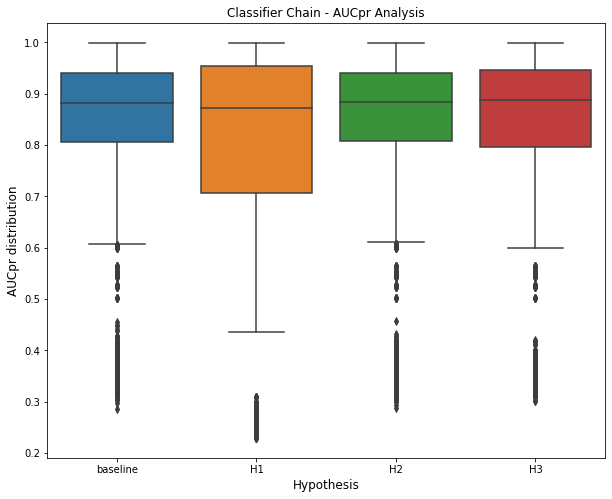

In [36]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(y='AUC-PR',x='H',data=dataBinary)
plt.ylabel("AUCpr distribution", size=12)
plt.xlabel("Hypothesis",size=12)
plt.title("Classifier Chain - AUCpr Analysis", size=12)
plt.show()


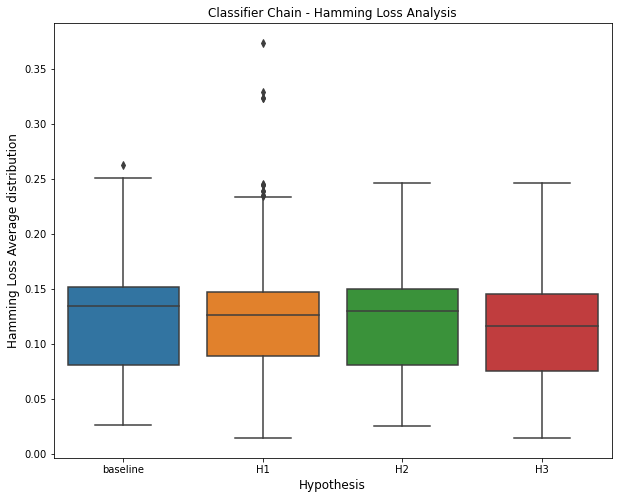

In [37]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(y='hamming_loss_avg',x='H',data=dataBinary)
plt.ylabel("Hamming Loss Average distribution", size=12)
plt.xlabel("Hypothesis",size=12)
plt.title("Classifier Chain - Hamming Loss Analysis", size=12)
plt.show()

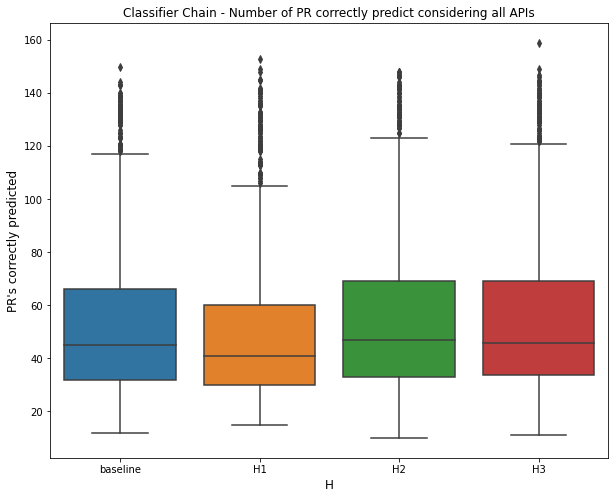

In [38]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(y='Accuracy_Score_not_normalized',x='H',data=dataBinary)
plt.ylabel("PR's correctly predicted", size=12)
plt.xlabel("H",size=12)
plt.title("Classifier Chain - Number of PR correctly predict considering all APIs", size=12)
plt.show()

In [10]:
def cliffsDelta(lst1, lst2, **dull):

    """Returns delta and true if there are more than 'dull' differences"""
    if not dull:
        dull = {'small': 0.147, 'medium': 0.33, 'large': 0.474} # effect sizes from (Hess and Kromrey, 2004)
    m, n = len(lst1), len(lst2)
    lst2 = sorted(lst2)
    j = more = less = 0
    for repeats, x in runs(sorted(lst1)):
        while j <= (n - 1) and lst2[j] < x:
            j += 1
        more += j*repeats
        while j <= (n - 1) and lst2[j] == x:
            j += 1
        less += (n - j)*repeats
    d = (more - less) / (m*n)
    size = lookup_size(d, dull)
    return d, size


def lookup_size(delta: float, dull: dict) -> str:
    """
    :type delta: float
    :type dull: dict, a dictionary of small, medium, large thresholds.
    """
    delta = abs(delta)
    if delta < dull['small']:
        return 'negligible'
    if dull['small'] <= delta < dull['medium']:
        return 'small'
    if dull['medium'] <= delta < dull['large']:
        return 'medium'
    if delta >= dull['large']:
        return 'large'


def runs(lst):
    """Iterator, chunks repeated values"""
    for j, two in enumerate(lst):
        if j == 0:
            one, i = two, 0
        if one != two:
            yield j - i, one
            i = j
        one = two
    yield j - i + 1, two

In [11]:
#https://machinelearningmastery.com/effect-size-measures-in-python/
#Small Effect Size: d=0.20
#Medium Effect Size: d=0.50
#Large Effect Size: d=0.80

from numpy import mean
from numpy import var
from math import sqrt

def cohend(d1, d2):
	# calculate the size of samples
	n1, n2 = len(d1), len(d2)
	# calculate the variance of the samples
	s1, s2 = var(d1, ddof=1), var(d2, ddof=1)
	# calculate the pooled standard deviation
	s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
	# calculate the means of the samples
	u1, u2 = mean(d1), mean(d2)
	# calculate the effect size
	return (u1 - u2) / s


In [33]:
#Subsetting data to compute Stats

Baseline_binary = dataBinary[dataBinary.Algorithm == 'Baseline']
Baseline_FMeasure = Baseline_binary['Fmeasure_Score']

H1_binary = dataBinary[dataBinary.Algorithm == 'H1']
H1_FMeasure = H1_binary['Fmeasure_Score']

H2_binary = dataBinary[dataBinary.Algorithm == 'H2']
H2_FMeasure = H2_binary['Fmeasure_Score']

H3_binary = dataBinary[dataBinary.Algorithm == 'H3']
H3_FMeasure = H3_binary['Fmeasure_Score']




In [34]:
##Kruskall Wallis - Group Comparison

#Fail to Reject H0: Paired sample distributions are equal.
#Reject H0: Paired sample distributions are not equal.
    
from scipy.stats import kruskal
# seed the random number generator


# compare samples
stat, p = kruskal(Baseline_FMeasure,H1_FMeasure, H2_FMeasure,H3_FMeasure)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=16.674, p=0.001
Different distributions (reject H0)


In [35]:
#https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
from scipy.stats import friedmanchisquare

# compare samples
stat, p = friedmanchisquare(Baseline_FMeasure,H1_FMeasure,H2_FMeasure,H3_FMeasure)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')


Statistics=21.000, p=0.000
Different distributions (reject H0)


In [61]:
#### MANN-U Independent Samples
from scipy.stats import mannwhitneyu

#Fail to Reject H0: Sample distributions are equal.
#Reject H0: Sample distributions are not equal.

##### Defining variables to be comparede

# compare samples
stat, p = mannwhitneyu(Baseline_FMeasure, H1_FMeasure)
print('Statistics=%.3f, p=%.5f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')
# compare samples
stat, p = mannwhitneyu(Baseline_FMeasure, H2_FMeasure)
print('Statistics=%.3f, p=%.5f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')
# compare samples
stat, p = mannwhitneyu(Baseline_FMeasure, H2_FMeasure)
print('Statistics=%.3f, p=%.5f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')
    
# compare samples
stat, p = mannwhitneyu(H1_FMeasure, H2_FMeasure)
print('Statistics=%.3f, p=%.5f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')
# compare samples
stat, p = mannwhitneyu(H1_FMeasure, H3_FMeasure)
print('Statistics=%.3f, p=%.5f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

# compare samples
stat, p = mannwhitneyu(H2_FMeasure, H3_FMeasure)
print('Statistics=%.3f, p=%.5f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')
    
#Effect_Size Baseline Vs others   
print(cliffsDelta(Baseline_FMeasure, H1_FMeasure))
print(cliffsDelta(Baseline_FMeasure, H2_FMeasure))
print(cliffsDelta(Baseline_FMeasure, H3_FMeasure))

#Effect_Size H1 Vs others
print(cliffsDelta(H1_FMeasure, H2_FMeasure))
print(cliffsDelta(H1_FMeasure, H3_FMeasure))

#Effect_Size H2 Vs others
print(cliffsDelta(H2_FMeasure, H3_FMeasure))



Statistics=7.000, p=0.00066
Different distribution (reject H0)
Statistics=10.000, p=0.00141
Different distribution (reject H0)
Statistics=10.000, p=0.00141
Different distribution (reject H0)
Statistics=48.000, p=0.45486
Same distribution (fail to reject H0)
Statistics=38.000, p=0.19234
Same distribution (fail to reject H0)
Statistics=35.000, p=0.13652
Same distribution (fail to reject H0)
(-0.86, 'large')
(-0.8, 'large')
(-0.88, 'large')
(0.04, 'negligible')
(-0.24, 'small')
(-0.3, 'small')


In [37]:
#Effect_Size RandomForest Vs others   
print('Cohens d: %.3f' % cohend(RF_FMeasure, LogisticRegression_FMeasure))    
print('Cohens d: %.3f' % cohend(RF_FMeasure, MLPC_FMeasure))
print('Cohens d: %.3f' % cohend(RF_FMeasure, DT_FMeasure))
print('Cohens d: %.3f' % cohend(RF_FMeasure, MlkNN_FMeasure))

#Effect_Size LogisticRegression Vs others
print('Cohens d: %.3f' % cohend(LogisticRegression_FMeasure, MLPC_FMeasure))    
print('Cohens d: %.3f' % cohend(LogisticRegression_FMeasure, DT_FMeasure))    
print('Cohens d: %.3f' % cohend(LogisticRegression_FMeasure, MlkNN_FMeasure))    

#Effect_Size MLPC Vs others
print('Cohens d: %.3f' % cohend(MLPC_FMeasure, DT_FMeasure))    
print('Cohens d: %.3f' % cohend(MLPC_FMeasure, MlkNN_FMeasure))    

#Effect_Size MlkNN Vs others
print('Cohens d: %.3f' % cohend(MlkNN_FMeasure,DT_FMeasure))    

NameError: name 'RF_FMeasure' is not defined

In [38]:
### Wilcoxon paired and dependent samples

#Fail to Reject H0: Sample distributions are equal.
#Reject H0: Sample distributions are not equal.

#from scipy.stats import wilcoxon

#stat, p = wilcoxon(data1, data2)
#print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
#alpha = 0.05
#if p > alpha:
#	print('Same distribution (fail to reject H0)')
#else:
#	print('Different distribution (reject H0)')

In [48]:
###Precision analysis
#Subsetting data to compute Stats

Baseline_binary = dataBinary[dataBinary.Algorithm == 'Baseline']
Baseline_Precision = Baseline_binary['Precision']

H1_binary = dataBinary[dataBinary.Algorithm == 'H1']
H1_Precision = H1_binary['Precision']

H2_binary = dataBinary[dataBinary.Algorithm == 'H2']
H2_Precision = H2_binary['Precision']

H3_binary = dataBinary[dataBinary.Algorithm == 'H3']
H3_Precision = H3_binary['Precision']

In [62]:
#### MANN-U Independent Samples
from scipy.stats import mannwhitneyu

#Fail to Reject H0: Sample distributions are equal.
#Reject H0: Sample distributions are not equal.

##### Defining variables to be comparede

# compare samples
stat, p = mannwhitneyu(Baseline_Precision, H1_Precision)
print('Statistics=%.3f, p=%.5f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')
# compare samples
stat, p = mannwhitneyu(Baseline_Precision, H2_Precision)
print('Statistics=%.3f, p=%.5f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')
# compare samples
stat, p = mannwhitneyu(Baseline_Precision, H3_Precision)
print('Statistics=%.3f, p=%.5f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

# compare samples
stat, p = mannwhitneyu(H1_Precision, H2_Precision)
print('Statistics=%.3f, p=%.5f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

    # compare samples
stat, p = mannwhitneyu(H1_Precision, H3_Precision)
print('Statistics=%.3f, p=%.5f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')
 
# compare samples
stat, p = mannwhitneyu(H2_Precision, H3_Precision)
print('Statistics=%.3f, p=%.5f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')
    
#Effect_Size RandomForest Vs others   
print(cliffsDelta(Baseline_Precision, H1_Precision))
print(cliffsDelta(Baseline_Precision,H2_Precision))
print(cliffsDelta(Baseline_Precision, H3_Precision))

#Effect_Size H1 Vs others
print(cliffsDelta(H1_Precision,H2_Precision))
print(cliffsDelta(H1_Precision, H3_Precision))

#Effect_SizeH2 Vs others
print(cliffsDelta(H2_Precision, H3_Precision))



Statistics=4.000, p=0.00029
Different distribution (reject H0)
Statistics=6.000, p=0.00050
Different distribution (reject H0)
Statistics=6.000, p=0.00050
Different distribution (reject H0)
Statistics=48.000, p=0.45486
Same distribution (fail to reject H0)
Statistics=44.000, p=0.33879
Same distribution (fail to reject H0)
Statistics=46.000, p=0.39567
Same distribution (fail to reject H0)
(-0.92, 'large')
(-0.88, 'large')
(-0.88, 'large')
(0.04, 'negligible')
(-0.12, 'negligible')
(-0.08, 'negligible')


In [19]:
##Kruskall Wallis - Group Comparison

#Fail to Reject H0: Paired sample distributions are equal.
#Reject H0: Paired sample distributions are not equal.
    
from scipy.stats import kruskal
# seed the random number generator


# compare samples
stat, p = kruskal(RF_Precision,LogisticRegression_Precision, MLPC_Precision,DT_Precision,MlkNN_Precision)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=nan, p=nan
Different distributions (reject H0)


In [20]:
#https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
from scipy.stats import friedmanchisquare

# compare samples
stat, p = friedmanchisquare(RF_Precision,LogisticRegression_Precision, MLPC_Precision,DT_Precision,MlkNN_Precision)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

ZeroDivisionError: division by zero